#### Importing all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

# -> Load the dataset

In [3]:
fs= pd.read_csv("festival_csv.csv")


In [4]:
fs.head(2)

,Order ID,Date,Status,Category,Qty,Amount,ship-state,Total revenue,Cost,Profit Margin,Profit
0,408-7698765-2294756,2024-01-01,Shipped - Delivered to Buyer,Set,1.0,1338.0,MAHARASHTRA,1338.0,926.45,30.76,411.55
1,171-2705563-6985105,2024-01-01,Shipped,Set,6.0,692.0,NAGALAND,4152.0,1514.96,63.51,2637.04


In [5]:
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       10000 non-null  object 
 1   Date           10000 non-null  object 
 2   Status         10000 non-null  object 
 3   Category       9980 non-null   object 
 4   Qty            8644 non-null   float64
 5   Amount         9761 non-null   float64
 6   ship-state     10000 non-null  object 
 7   Total revenue  8464 non-null   float64
 8   Cost           10000 non-null  float64
 9   Profit Margin  7530 non-null   float64
 10  Profit         10000 non-null  float64
dtypes: float64(6), object(5)
memory usage: 859.5+ KB


In [7]:
fs.isnull().sum()

Order ID            0
Date                0
Status              0
Category           20
Qty              1356
Amount            239
ship-state          0
Total revenue    1536
Cost                0
Profit Margin    2470
Profit              0
dtype: int64

<b> Initial Inspections:</b> We came to know,The dataset contains 10,000 entries and 11 columns.
<ol><b>-></b> The missing values counts and data types:</ol>

 <li>There are missing values in <b>'Category'(20), 'Qty'(1356), 'Amount'(239), 'Total revenue'(1536), and 'Profit Margin'(2470)</b> columns. </li>
 <li>The <b>'Date' </b>column is currently of object type and <b> need a conversion to datetime for time-based analysis.</b></li>


#### <u> -> Duplicate rows count

In [8]:
fs.duplicated().sum()



np.int64(344)

In [9]:
# Drop rows where 'Qty' is 0 if any

fs_filtered = fs[fs['Qty'] != 0].copy()
fs_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9331 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9331 non-null   object 
 1   Date           9331 non-null   object 
 2   Status         9331 non-null   object 
 3   Category       9311 non-null   object 
 4   Qty            7975 non-null   float64
 5   Amount         9092 non-null   float64
 6   ship-state     9331 non-null   object 
 7   Total revenue  7795 non-null   float64
 8   Cost           9331 non-null   float64
 9   Profit Margin  7530 non-null   float64
 10  Profit         9331 non-null   float64
dtypes: float64(6), object(5)
memory usage: 874.8+ KB


# -> Preprocessing

#### <u> Step 1-> Convert 'Date' into datetime.

In [10]:
fs_filtered['Date'] = pd.to_datetime(fs_filtered['Date'])

#### <u> Step 2-> Error handling (coercing errors).

In [11]:
fs_filtered['Qty'] = pd.to_numeric(fs_filtered['Qty'], errors='coerce')
fs_filtered['Amount'] = pd.to_numeric(fs_filtered['Amount'], errors='coerce')
fs_filtered['Total revenue'] = pd.to_numeric(fs_filtered['Total revenue'], errors='coerce')
fs_filtered['Cost'] = pd.to_numeric(fs_filtered['Cost'], errors='coerce')
fs_filtered['Profit Margin'] = pd.to_numeric(fs_filtered['Profit Margin'], errors='coerce')
fs_filtered['Profit'] = pd.to_numeric(fs_filtered['Profit'], errors='coerce')


#### <u> Step 3 -> filling the missing values with median (median would provide a more robust and less biased estimation of missing values.)

In [12]:
fs_filtered['Qty'] = fs_filtered['Qty'].fillna(fs_filtered['Qty'].median())
fs_filtered['Amount'] = fs_filtered['Amount'].fillna(fs_filtered['Amount'].median())   
fs_filtered['Total revenue'] = fs_filtered['Total revenue'].fillna(fs_filtered['Total revenue'].median())
fs_filtered['Cost'] = fs_filtered['Cost'].fillna(fs_filtered['Cost'].median())
fs_filtered['Profit Margin'] = fs_filtered['Profit Margin'].fillna(fs_filtered['Profit Margin'].median())
fs_filtered['Profit'] = fs_filtered['Profit'].fillna(fs_filtered['Profit'].median())

#### <u> Step 4 -> Removing Duplicate Rows

In [13]:
fs_filtered.drop_duplicates(inplace=True)

#### <u> Step 5 ->  filling categorical column with mode (most frequent value)

In [14]:
fs_filtered['Category'] = fs_filtered['Category'].fillna(fs_filtered['Category'].mode()[0])
fs_filtered['Status'] = fs_filtered['Status'].fillna(fs_filtered['Status'].mode()[0])
fs_filtered['ship-state'] = fs_filtered['ship-state'].fillna(fs_filtered['ship-state'].mode()[0])

In [16]:
print(fs_filtered.isnull().sum().to_markdown(numalign="left", stralign="left"))

|               | 0   |
|:--------------|:----|
| Order ID      | 0   |
| Date          | 0   |
| Status        | 0   |
| Category      | 0   |
| Qty           | 0   |
| Amount        | 0   |
| ship-state    | 0   |
| Total revenue | 0   |
| Cost          | 0   |
| Profit Margin | 0   |
| Profit        | 0   |


# -> Descriptive analysis

In [17]:
print("Dataset information after preprocessing:")
print(fs_filtered.info())

Dataset information after preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 9005 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9005 non-null   object        
 1   Date           9005 non-null   datetime64[ns]
 2   Status         9005 non-null   object        
 3   Category       9005 non-null   object        
 4   Qty            9005 non-null   float64       
 5   Amount         9005 non-null   float64       
 6   ship-state     9005 non-null   object        
 7   Total revenue  9005 non-null   float64       
 8   Cost           9005 non-null   float64       
 9   Profit Margin  9005 non-null   float64       
 10  Profit         9005 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 844.2+ KB
None


In [18]:
print("\nDescriptive stats of the dataset:")
print(fs_filtered.describe().to_markdown(numalign="left", stralign="left"))


Descriptive stats of the dataset:
|       | Date                          | Qty     | Amount   | Total revenue   | Cost    | Profit Margin   | Profit   |
|:------|:------------------------------|:--------|:---------|:----------------|:--------|:----------------|:---------|
| count | 9005                          | 9005    | 9005     | 9005            | 9005    | 9005            | 9005     |
| mean  | 2024-07-02 01:49:22.754025472 | 1.55569 | 622.506  | 971.793         | 444.567 | 49.0686         | 487.993  |
| min   | 2024-01-01 00:00:00           | 1       | 0        | 0               | 0       | 30.01           | 0        |
| 25%   | 2024-03-31 00:00:00           | 1       | 406      | 517             | 210.33  | 42.58           | 212.066  |
| 50%   | 2024-07-02 00:00:00           | 1       | 574      | 690             | 297.91  | 49.53           | 286.86   |
| 75%   | 2024-10-01 00:00:00           | 1       | 744      | 995             | 441.58  | 55.1            | 425.22   |
| max

#### <u> -> Summary of preprocessing 

 

<li> The dataset contains <b>9005 entries and 11 columns after Preprocessing</b></li>

<li>The Date column was initially of object type and <b>has been converted to datetime successfully</b></li>


<li>Rows where Qty was 0 were removed.</li>

<li>Missing values in numerical columns (Qty, Amount, Total revenue, Profit Margin) were <b>filled with the median</b> of their respective columns.</li>

<li>Missing values in the Category column were <b> filled with the mode (most frequent value)</b></li>

<li>Duplicate rows were successfully removed.</li>

After all preprocessing steps, there are no remaining missing values in the dataset, and we have 9005 unique and valid entries remains.

#### <u> Statistical information:

<li><b>Quantity (Qty):</b> The average quantity per order is approximately 1.55, with a maximum of 10.</li>

<li><b>Amount:</b> The average amount per order is around 622.50.</li>

<li><b>Total Revenue:</b> The average total revenue per entry is about 971.79.</li>

<li><b>Cost:</b> The average cost is approximately 444.50.</li>

<li><b>Profit Margin:</b> The average profit margin is around 49.06%.</li>

<li><b>Profit:</b> The average profit per order is approximately 487.23.</li>

<li><b>75% orders are 1</b></li>

<li><b>Status Distribution:</b> The majority of orders have a 'Shipped' status, followed by 'Shipped - Delivered to Buyer', 'Cancelled', and a small number of 'Shipped - Returned to Seller'.</li>

<li><b>Category Distribution:</b> 'kurta' and 'Set' are the most frequent categories, followed by 'Western Dress', 'Top', 'Ethnic Dress', and 'Bottom'.</li>

<li><b>Ship-State Distribution:</b> 'KARNATAKA', 'MAHARASHTRA', and 'TELANGANA' are the states with the highest number of orders.</li>

In [23]:
 
print("Value counts for 'Status':")
print(fs_filtered['Status'].value_counts().to_markdown(numalign="left", stralign="left"))


Value counts for 'Status':
| Status                       | count   |
|:-----------------------------|:--------|
| Shipped                      | 6659    |
| Shipped - Delivered to Buyer | 1801    |
| Cancelled                    | 525     |
| Shipped - Returned to Seller | 20      |


In [24]:
print("Value counts for 'Category':")
print(fs_filtered['Category'].value_counts().to_markdown(numalign="left", stralign="left"))


Value counts for 'Category':
| Category      | count   |
|:--------------|:--------|
| kurta         | 3853    |
| Set           | 3564    |
| Western Dress | 889     |
| Top           | 614     |
| Ethnic Dress  | 58      |
| Bottom        | 27      |


In [25]:
print("Value counts for 'ship-state':")
print(fs_filtered['ship-state'].value_counts().to_markdown(numalign="left", stralign="left"))

Value counts for 'ship-state':
| ship-state        | count   |
|:------------------|:--------|
| KARNATAKA         | 1559    |
| MAHARASHTRA       | 1149    |
| TELANGANA         | 955     |
| UTTAR PRADESH     | 774     |
| WEST BENGAL       | 619     |
| TAMIL NADU        | 601     |
| DELHI             | 380     |
| Gujarat           | 309     |
| MADHYA PRADESH    | 299     |
| HARYANA           | 277     |
| ODISHA            | 256     |
| UTTARAKHAND       | 255     |
| ASSAM             | 247     |
| KERALA            | 233     |
| BIHAR             | 217     |
| ANDHRA PRADESH    | 206     |
| RAJASTHAN         | 120     |
| NAGALAND          | 85      |
| CHHATTISGARH      | 71      |
| JAMMU & KASHMIR   | 70      |
| PUNJAB            | 53      |
| JHARKHAND         | 52      |
| HIMACHAL PRADESH  | 45      |
| CHANDIGARH        | 30      |
| ARUNACHAL PRADESH | 29      |
| MEGHALAYA         | 28      |
| GOA               | 26      |
| MANIPUR           | 21      |
| Goa    

#### <u> Collinear Matrix

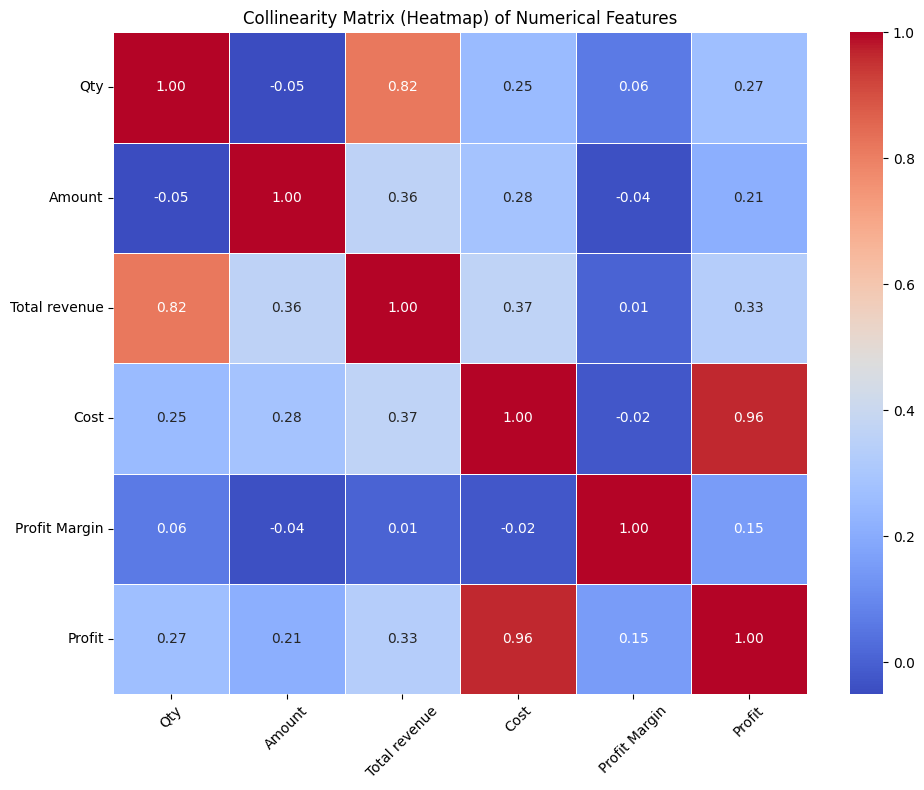

Collinearity heatmap displayed.


In [26]:
#After knowing all neccesaary information about the dataset we have plotted the collinear matrix by the using heatmap
# Selecting only numerical columns for correlation calculation
numerical_fs = fs_filtered.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_fs.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Collinearity Matrix (Heatmap) of Numerical Features')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show() 
print("Collinearity heatmap displayed.")

<li><b>Very Strong Positive Correlations</b></li>
<ol><b>Cost and Profit(0.96): </b> This means higher costs are highly associated with higher profits.</ol>
<ol><b>Qty and Total revenue (0.82):</b> This means as the quantity of items sold increases, the total revenue will also increase significantly.</ol>
<li><b>Moderate Positive Correlation:</b></li>
<ol><b>Total revenue and Cost (0.37):</b> implise that as the total revenue increases, overall costs also tend to rise.</ol>
<ol><b>Amount and Total revenue (0.36):</b> Indicates that higher individual transaction amounts contribute moderately to higher total revenue.</ol>
<ol><b> Qty and Profit (0.27):</b>  implying that selling more items generally contributes to higher overall profit.</ol>
<ol><b>Qty and Cost (0.25):</b> where higher quantities in an order are somewhat linked to higher costs for that order.</ol>
<ol><b>Amount and Cost (0.28):</b>  suggesting higher transaction amounts are somewhat associated with higher costs.</ol>
<li><b>Weak to Negligible Relationships:</b></li>
<ol><b>Qty and Amount (-0.005):</b> means that the quantity sold doesn't strongly depend on the individual item's amount.


#### <u> -> Finding Outliers


Outliers found in column 'Qty' (first 5):
    Qty
1   6.0
10  8.0
13  3.0
20  3.0
22  4.0
Total outliers in 'Qty': 1670

Outliers found in column 'Amount' (first 5):
     Amount
0    1338.0
39   1338.0
60   1281.0
103  1281.0
203  1281.0
Total outliers in 'Amount': 185

Outliers found in column 'Total revenue' (first 5):
    Total revenue
1          4152.0
10         3800.0
22         1944.0
50         3285.0
53         1895.0
Total outliers in 'Total revenue': 1055

Outliers found in column 'Cost' (first 5):
       Cost
0    926.45
1   1514.96
10  1502.85
20  1014.79
39   826.94
Total outliers in 'Cost': 703

Outliers found in column 'Profit Margin' (first 5):
Empty DataFrame
Columns: [Profit Margin]
Index: []
Total outliers in 'Profit Margin': 0

Outliers found in column 'Profit' (first 5):
         Profit
1   2637.040000
10  2297.150000
50   801.777283
53  1191.530000
60   753.750000
Total outliers in 'Profit': 901

 Visualizing Spikes (Box Plots)


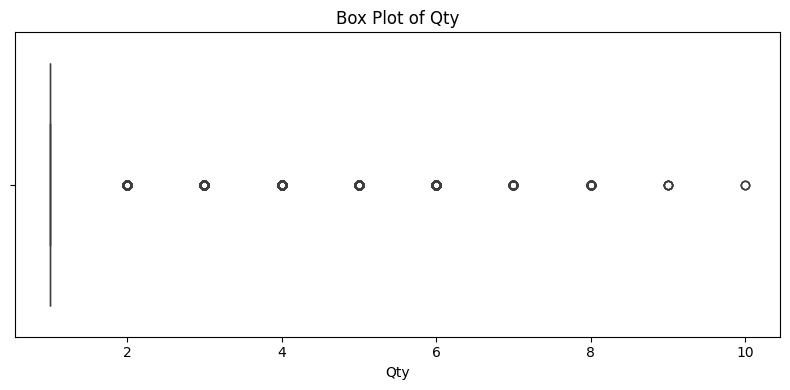

Box plot for 'Qty' displayed.


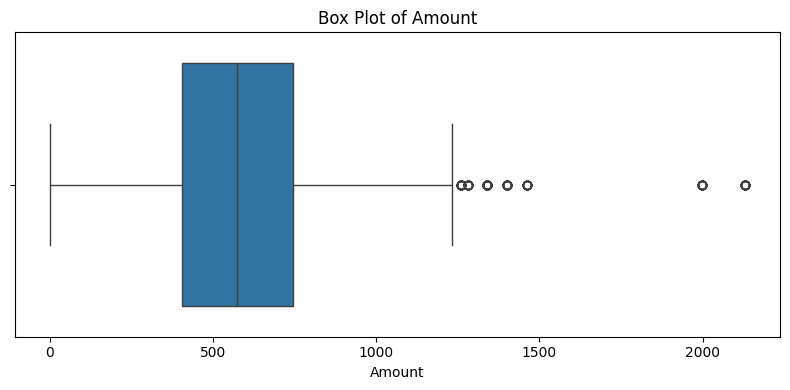

Box plot for 'Amount' displayed.


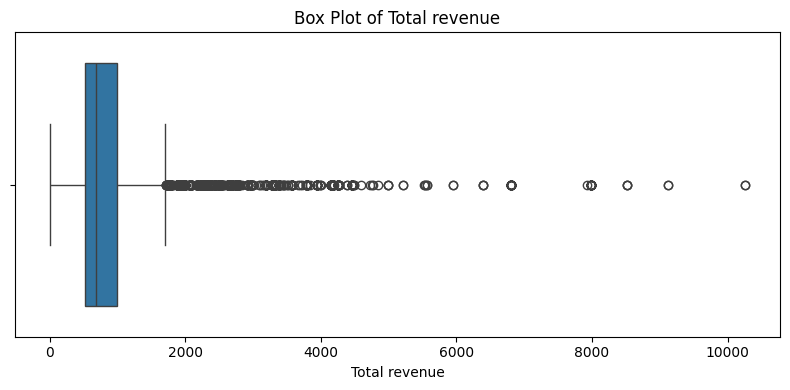

Box plot for 'Total revenue' displayed.


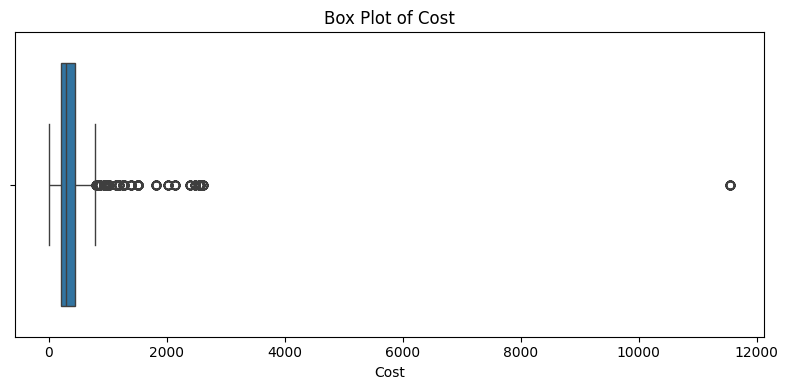

Box plot for 'Cost' displayed.


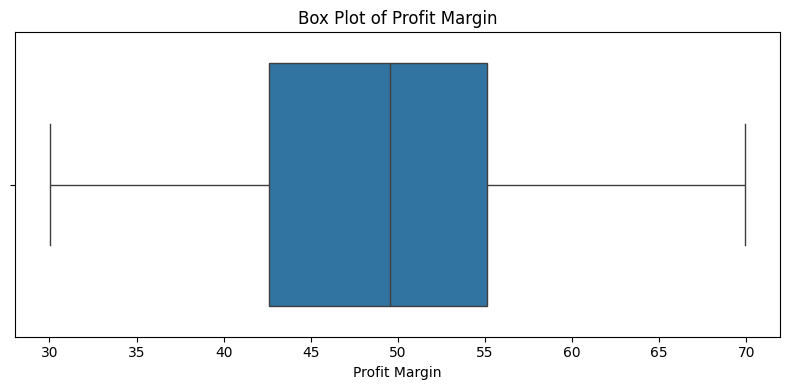

Box plot for 'Profit Margin' displayed.


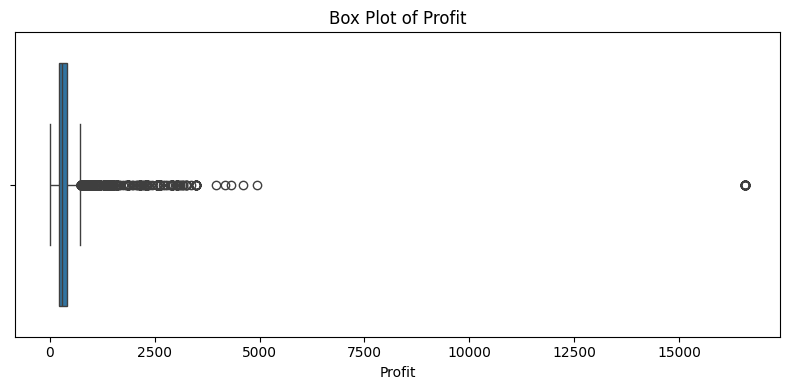

Box plot for 'Profit' displayed.


In [27]:
#IQR method is used to measure the spread of the data,it focuses on central bulk of the data.
numerical_fs = fs_filtered.select_dtypes(include=np.number)
outliers = {}

for column in numerical_fs.columns:
    Q1 = numerical_fs[column].quantile(0.25)
    Q3 = numerical_fs[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR #1.5 is a conventional mutiplier,used to establish a reasonable boundry for outliers
    upper_bound = Q3 + 1.5 * IQR

    column_outliers = numerical_fs[(numerical_fs[column] < lower_bound) | (numerical_fs[column] > upper_bound)]
    print(f"\nOutliers found in column '{column}' (first 5):\n{column_outliers[[column]].head()}")
    print(f"Total outliers in '{column}': {len(column_outliers)}")
    outliers[column] = column_outliers  # Store outliers

# Visualize outliers using box plots
print("\n Visualizing Spikes (Box Plots)")
for column in numerical_fs.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=numerical_fs[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.tight_layout()
    plt.show()
   
    print(f"Box plot for '{column}' displayed.")


## Analysis For Spikes In Sales During Festive Season

In [28]:
festivals = pd.DataFrame({
    "Festival": [
        "Lohri", "Pongal", "Makar Sankranti", "Vasant Panchami","Holi", "Eid-ul-Fitr", "Raksha Bandhan", "Janmashtami", "Ganesh Chaturthi", "Navratri", "Dussehra", "Diwali", "Govardhan Puja", "Bhai Dooj", "Christmas"
    ],
    "Start": [
        "2024-01-13", "2024-01-15", "2024-01-15", "2024-02-10","2024-03-25", "2024-04-10", "2024-08-19", "2024-08-26","2024-09-07", "2024-10-03", "2024-10-12", "2024-10-31","2024-11-01", "2024-11-03", "2024-12-25"
    ],
    "End": [
        "2024-01-13", "2024-01-18", "2024-01-15", "2024-02-10","2024-03-26", "2024-04-11", "2024-08-19", "2024-08-26","2024-09-08", "2024-10-11", "2024-10-12", "2024-10-31","2024-11-01", "2024-11-03", "2024-12-25"
    ]
})

festivals["Start"] = pd.to_datetime(festivals["Start"])
festivals["End"] = pd.to_datetime(festivals["End"])

In [29]:
# Initialisimg the flag column with 0
fs_filtered["Festival_Flag"] = 0

# updating the flag
for _, row in festivals.iterrows():
   fs_filtered.loc[(fs_filtered["Date"] >= row["Start"]) & (fs_filtered["Date"] <= row["End"]), "Festival_Flag"] = 1

In [30]:
fs_filtered[fs_filtered["Festival_Flag"] == 1]

,Order ID,Date,Status,Category,Qty,Amount,ship-state,Total revenue,Cost,Profit Margin,Profit,Festival_Flag
283,404-1856281-9996319,2024-01-13,Shipped - Delivered to Buyer,Western Dress,3.0,472.0,MADHYA PRADESH,1416.0,253.41,46.31,247.354296,1
284,402-2155477-9353103,2024-01-13,Shipped,Set,3.0,1173.0,ODISHA,3519.0,819.78,30.11,448.638446,1
285,405-9144614-1601126,2024-01-13,Shipped - Delivered to Buyer,kurta,2.0,533.0,TELANGANA,1066.0,208.09,49.53,385.861110,1
287,171-6138639-1478731,2024-01-13,Shipped,kurta,3.0,318.0,TELANGANA,954.0,178.72,43.80,172.109305,1
288,402-8519791-3706738,2024-01-13,Shipped,Set,1.0,852.0,DELHI,690.0,11545.63,58.94,16570.370000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9839,402-0294212-5431551,2024-12-25,Shipped,kurta,2.0,399.0,UTTAR PRADESH,798.0,254.01,36.34,165.351114,1
9841,171-3625443-6505905,2024-12-25,Shipped,Western Dress,2.0,725.0,KERALA,1450.0,261.68,63.91,641.935213,1
9842,404-5337874-2284337,2024-12-25,Shipped,Set,2.0,568.0,KARNATAKA,1136.0,232.41,59.08,401.730789,1
9843,171-3953233-6135505,2024-12-25,Shipped,kurta,10.0,399.0,UTTAR PRADESH,3990.0,995.43,58.42,3265.598403,1


# -> VISUALIZATION

# LINE chart-> "Total revenue per day"

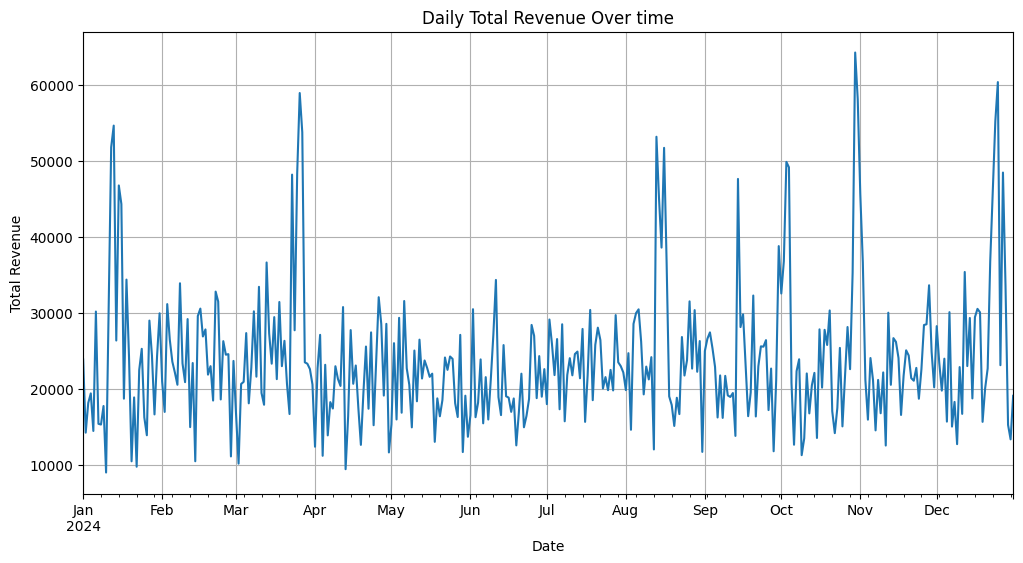

In [31]:
daily_sales = fs_filtered.groupby("Date")["Total revenue"].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title("Daily Total Revenue Over time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

#### <u> Insights

1. **Revenue Spikes Around Major Festivals**
- <b>October to November</b> (Navratri to Diwali): There is a noticeable and consistent rise in revenue from early October through early November. This period includes Navratri, Dussehra, Diwali, Govardhan Puja, and Bhai Dooj, which often lead to higher spending.
-  <b>December 25 (Christmas)</b>: Sales show an increase around Christmas.
-  <b>March (Holi):</b> A clear increase in revenue is seen around Holi.
-  <b>January:</b> Month of January is due to a series of festival which include Lohri, Pongal and Makar Sankranti. These festivals contribute to high spending by the customer

2. **Sales Stay High Before and During Festivals**

Revenue tends to rise not just on the festival days but also in the 3 to 5 days leading up to them, likely due to early shopping and preparations.

3. **Low Revenue Periods**

February, May, June and July show lower sales, which could be due to fewer major festivals during those times.


# BAR chart -> "Average Sales: Festival vs Non-Festival Days"

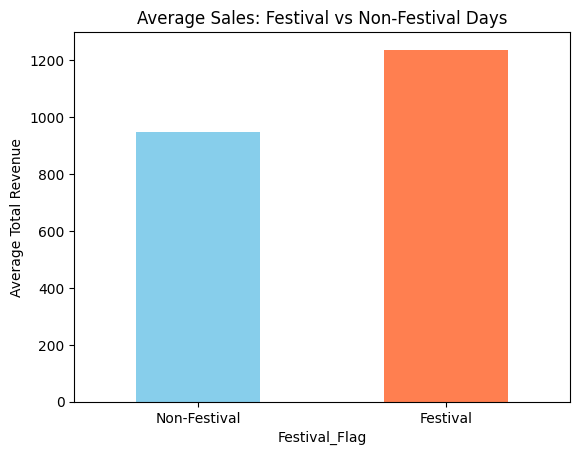

Festival_Flag
0     948.853244
1    1238.166639
Name: Total revenue, dtype: float64


In [32]:
#Comparing Avg revenue gained in Festive and Non- Festive Days

avg_sales = fs_filtered.groupby("Festival_Flag")["Total revenue"].mean()
avg_sales.plot(kind='bar', color=['skyblue', 'coral'])
plt.xticks(ticks=[0,1], labels=['Non-Festival', 'Festival'], rotation=0)
plt.ylabel('Average Total Revenue')
plt.title('Average Sales: Festival vs Non-Festival Days')
plt.show()
print(avg_sales)


#### <u> Insights : The analysis shows the average total revenue on festival and non-festival days:**

>Festival Days :
 On **festival days**, the average revenue per order is approximately Rs 1238.

>Non-Festival Days :
On **non-festival days**, the average revenue per order is around Rs 950.

>The increase in average revenue during festivals suggests customers tend to spend more per order during festivals

# BAR chart ->"Top Months with Highest Revenue from Festival Days"

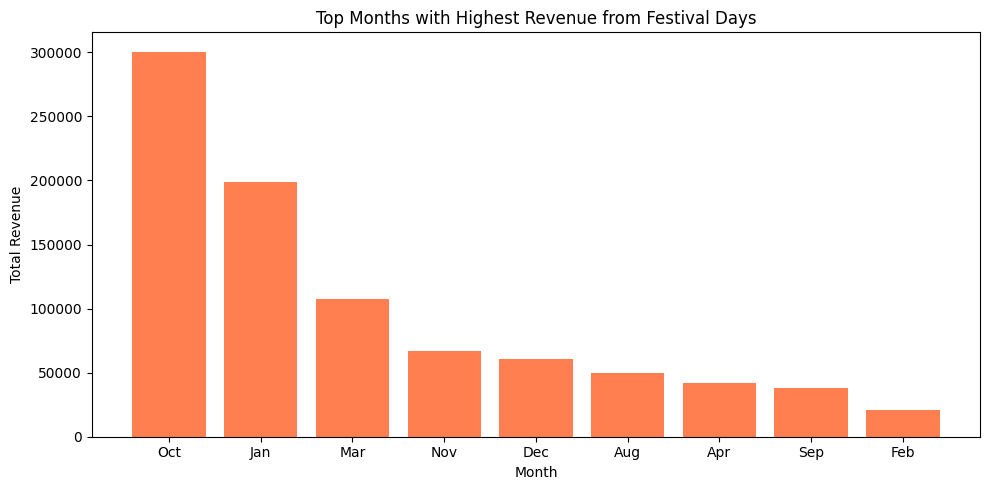

  Month  Month_Num  Total revenue
0   Oct         10      300606.98
1   Jan          1      198861.00
2   Mar          3      107262.00
3   Nov         11       66880.00
4   Dec         12       60354.00
5   Aug          8       49434.00
6   Apr          4       41738.00
7   Sep          9       38006.00
8   Feb          2       20909.00


In [33]:
# Extracting month name and number
fs_filtered['Month'] = fs_filtered['Date'].dt.strftime('%b') #Give abbreviation of month
fs_filtered['Month_Num'] = fs_filtered['Date'].dt.month

# Filter festival days
festival_df = fs_filtered[fs_filtered['Festival_Flag'] == 1]

# Group revenue by Month and Month_Num
festival_monthly_revenue = (festival_df.groupby(['Month', 'Month_Num'])['Total revenue'].sum().reset_index())

# Sort by revenue 
festival_monthly_revenue = festival_monthly_revenue.sort_values('Total revenue', ascending=False).reset_index(drop=True)

# Plot
plt.figure(figsize=(10,5))
plt.bar(festival_monthly_revenue['Month'], festival_monthly_revenue['Total revenue'], color='coral')
plt.title('Top Months with Highest Revenue from Festival Days')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()
print(festival_monthly_revenue)

#### <u> Insights
    1. **Revenue Spikes Around Major Festivals**

- **October**: This month shows the highest revenue (Rs 300606) from festival days, likely due to major festivals like **Navratri, Dussehra, and Diwali**.
- **January**: With revenue around (Rs 198861), January ranks second, by festivals such as **Lohri, Pongal, and Makar Sankranti**.
- **March**: **Holi** contributes to a noticeable increase in March’s festival revenue (Rs 107262).
- **November** and **December**: These months also has some festive activity, with **Govardhan Puja, Bhai Dooj, and Christmas** with revenue (Rs 66880 and Rs 60,354) respectively.

2. **Sales Stay High During festive Months**

Months like **October and January** demonstrate how nationally celebrated festivals lead to consistent spikes in sales.

3. **Low Revenue Periods**

- **February** sees the lowest festival revenue (Rs 20900), indicating minimal festival influence.
- **April, August, and September** also fall in the lower range.
- **May, June, and July** are absent from the dataset, implying **no major festivals**.

# Group BAR chart -> "Average Revenue per State: Festival vs Non-Festival Days"

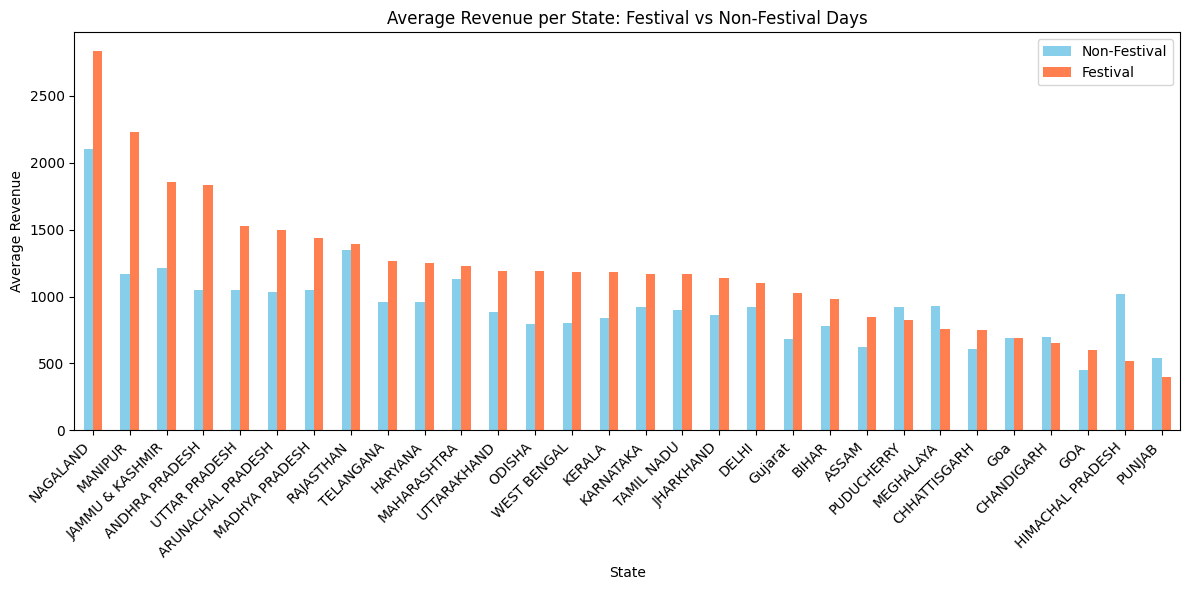

In [34]:
# Group by State and Festival Flag, then calculate average revenue
avg_revenue_state = fs_filtered.groupby(['ship-state', 'Festival_Flag'])['Total revenue'].mean().unstack(fill_value=0)

# Sorting
avg_revenue_state = avg_revenue_state.sort_values(by=1, ascending=False)

# Plot the grouped bar chart
avg_revenue_state.plot(kind='bar', figsize=(12,6), color=['skyblue', 'coral'])
plt.title("Average Revenue per State: Festival vs Non-Festival Days")
plt.xlabel("State")
plt.ylabel("Average Revenue")
plt.legend(["Non-Festival", "Festival"])
plt.xticks(rotation=45, ha='right')
plt.tight_layout() #Aviod Overlapping
plt.show()


#### <u> Insights
 
 Average Revenue by State During Festival vs Non-Festival Days

Here are the key points from the analysis:

> **Nagaland** had the highest average revenue during festivals (Rs 2,884), showing a big jump compared to non-festival days.

> **Manipur**, **Andhra Pradesh**, and **Jammu & Kashmir** also has much higher revenue during festivals.

> Most states earned **more per order** during festivals than on regular days.

> Few states like **Himachal Pradesh** and **Puducherry** has lower average revenue on festivals, which may be due to fewer buyers or low festival activity.

# Pie chart -> "Revenue Share By Product During Festivals"

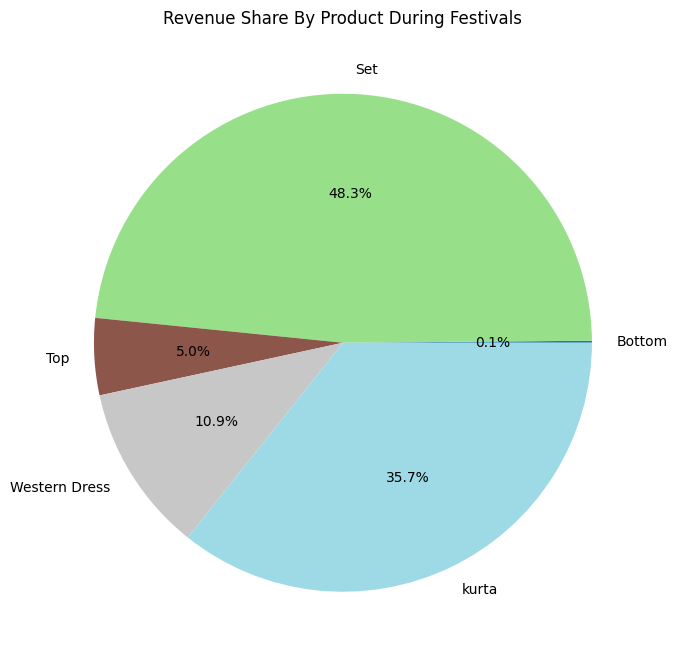

In [35]:
# revenue share of each product during Festival
festival_df = fs_filtered[fs_filtered['Festival_Flag'] == 1]

category_revenue = festival_df.groupby('Category')['Total revenue'].sum().dropna()
category_revenue.plot.pie(autopct='%1.1f%%', figsize=(7,7), cmap='tab20')

plt.title('Revenue Share By Product During Festivals')
plt.ylabel('')
plt.tight_layout()
plt.show()


#### <u> Insights

- The **Set** category leads festival sales, contributing **48.3%** of total festival revenue.  
- **Kurta** is the second leading product sharing revenue of  **35.7%**.  
- **Western Dress** shares **10.9%**.  
- The **Top** category contributes **5.0%**
- **Bottom** has the smallest share of **0.1%**.

Overall, the majority of festival revenue is driven by the **Set** and **Kurta** categories. Targeting these categories could help boost sales during festive periods.
